# Converting CO$_2$ densities to pressures to depths
- This notebook shows how to use the equation of state of pure CO$_2$ of Span and Wanger (1996) implemented through coolprop to calculate pressures of fluid inclusions
- We also show how to use Monte-Carlo simulations to propagate errors when determing fluid inclusion pressures
- We also show how to calculate densities to depths using a variety of crustal density models

## First, import all the python things you need

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import DiadFit as pf
pf.__version__

'0.0.38'

## Load your FI densities 
- In this example, we just load a simple spreadsheet with densities and a sample name. E.g. this could be from microthermometry, or from Raman

In [2]:
data=pd.read_excel('Fluid_Inclusion_Densities_Example1.xlsx')
data.head()

,Sample,Density_g_cm3,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,FI1,0.389845,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,FI2,0.923179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,FI4,0.393791,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P=rho g H
3,FI5,0.769280,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,FI7,0.741868,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,144471.6


## Simple conversion to pressure
- Most simply, you can convert each density to pressure using the equation of state of Span and Wagner, implemented in CoolProp.
- You also need an estimate of the entrapment temperature. Here we use a fixed value, but you could also allocate a temperature based on the forsterite content of your olivine, or any other thermometer suitable for your system
- Temperature must be in Kelvin!

In [3]:
P_kbar=pf.convert_co2_density_depth_Coolprop(T_K=1150+273.15,
CO2_dens_gcm3=data['Density_g_cm3'])
P_kbar

array([1.44599143, 6.78099451, 1.46683822, 4.57034146, 4.24694773,
       0.91859805, 1.87307875, 0.91531528, 0.19936915, 1.79060631,
       0.09776022, 4.9903035 , 0.35530121, 3.39419958, 1.53973441,
       0.65635356, 0.95292932, 3.22516604, 2.68647724, 2.83242954,
       2.98045557, 1.55317793, 0.53388795, 6.51798343, 2.81551717,
       0.04942685, 1.8105132 , 4.42379575, 4.27027002, 1.38311886,
       1.15072284, 0.59440679, 2.48076486, 2.98534626, 4.48329265,
       3.10916349, 1.8293273 , 5.28199252, 3.74802139, 1.00518556])

## Convert to Depth in a single step from density
- We can also specify a variety of options in this function to directly get depth, instead of pressure

### Using a constant crustal density of 2700 kg/m$^{3}$

In [4]:
D_Constant_rho=pf.convert_co2_density_depth_Coolprop(T_K=1150+273.15,
CO2_dens_gcm3=data['Density_g_cm3'], crust_dens_kgm3=2700, g=9.81, output='df')
D_Constant_rho.head()

,Pressure (kbar),Pressure (MPa),Depth (km),input_crust_dens_kgm3,input_T_K,input_CO2_dens_gcm3
0,1.445991,144.599143,5.459250,2700,1423.15,0.389845
1,6.780995,678.099451,25.601218,2700,1423.15,0.923179
2,1.466838,146.683822,5.537955,2700,1423.15,0.393791
3,4.570341,457.034146,17.255036,2700,1423.15,0.769280
4,4.246948,424.694773,16.034084,2700,1423.15,0.741868


### Using a two-step crustal density
- For this, specify a density above and below a boundary, e.g. volcanic pile vs. oceanic crust in an OIB, or crust vs mantle

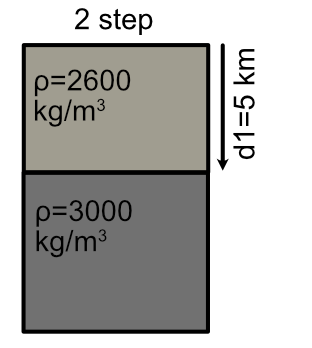

In [5]:
D_2_step=pf.convert_co2_density_depth_Coolprop(T_K=1150+273.15,
CO2_dens_gcm3=data['Density_g_cm3'], rho1=2600, rho2=3000, d1=5, g=9.81, output='df')
D_2_step.head()

,Pressure (kbar),Pressure (MPa),Depth (km),input_crust_dens_kgm3,input_T_K,input_CO2_dens_gcm3
0,1.445991,144.599143,5.579991,None,1423.15,0.389845
1,6.780995,678.099451,23.707763,None,1423.15,0.923179
2,1.466838,146.683822,5.650826,None,1423.15,0.393791
3,4.570341,457.034146,16.196199,None,1423.15,0.769280
4,4.246948,424.694773,15.097342,None,1423.15,0.741868


## Using a 3-step crustal density
- Here, we assume a volcanic layer, oceanic crust, and mantle. 

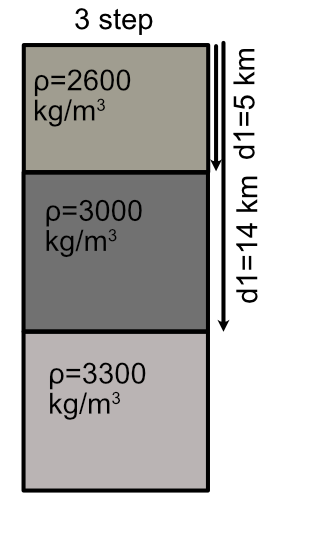

In [6]:
D_3_step=pf.convert_co2_density_depth_Coolprop(T_K=1150+273.15,
CO2_dens_gcm3=data['Density_g_cm3'], rho1=2600, rho2=3000, rho3=3300,
d1=5, d2=14, g=9.81, output='df')
D_3_step.head()

,Pressure (kbar),Pressure (MPa),Depth (km),input_crust_dens_kgm3,input_T_K,input_CO2_dens_gcm3
0,1.445991,144.599143,5.579991,None,1423.15,0.389845
1,6.780995,678.099451,22.825239,None,1423.15,0.923179
2,1.466838,146.683822,5.650826,None,1423.15,0.393791
3,4.570341,457.034146,15.996545,None,1423.15,0.769280
4,4.246948,424.694773,14.997584,None,1423.15,0.741868


## Using published density profiles - get more detail in the docs
- We also include the following crustal density profiles
- ryan_lerner: update of Ryan 1987 by Lerner et al. 2021 
- mavko_debari - Mavko and Thompson (1983) and DeBari and Greene (2011) from Putirka (2017)
- hill_zucca - Hill and Zucca (1987)  from Putirka (2017)
- prezzi - tweaked for andes, Prezzi et al. (2009) from Putirka (2017)
- rasmussen - Rasmussen et al. (2022) for arcs

In [7]:
D_Ras=pf.convert_co2_density_depth_Coolprop(T_K=1150+273.15,
CO2_dens_gcm3=data['Density_g_cm3'], model='rasmussen', output='df')
D_Ras.head()

,Pressure (kbar),Pressure (MPa),Depth (km),input_crust_dens_kgm3,input_T_K,input_CO2_dens_gcm3
0,1.445991,144.599143,5.757991,None,1423.15,0.389845
1,6.780995,678.099451,25.948012,None,1423.15,0.923179
2,1.466838,146.683822,5.836884,None,1423.15,0.393791
3,4.570341,457.034146,17.581919,None,1423.15,0.769280
4,4.246948,424.694773,16.358053,None,1423.15,0.741868


## Plot these up to see the differences

Text(0, 0.5, 'Depth (km)')

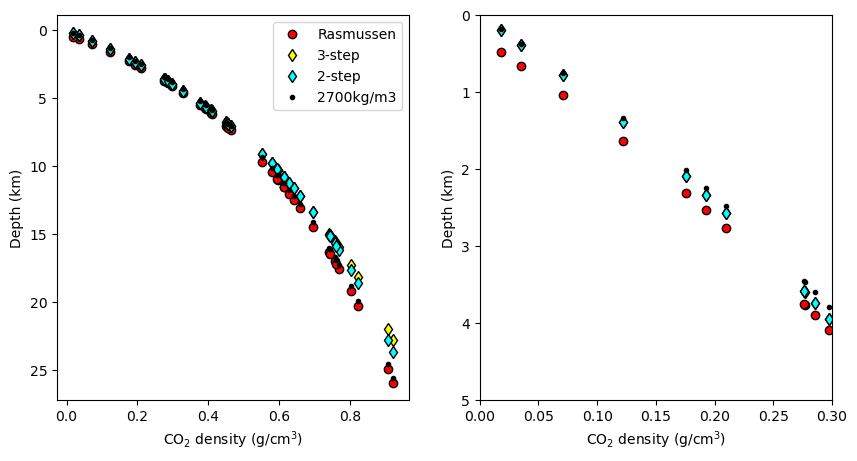

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot(D_Ras['input_CO2_dens_gcm3'], D_Ras['Depth (km)'],
         'ok', mfc='red', label='Rasmussen')
ax1.plot(D_3_step['input_CO2_dens_gcm3'], D_3_step['Depth (km)'],
         'dk', mfc='yellow', label='3-step')
ax1.plot(D_2_step['input_CO2_dens_gcm3'], D_2_step['Depth (km)'],
         'dk', mfc='cyan', label='2-step')
ax1.plot(D_Constant_rho['input_CO2_dens_gcm3'], D_Constant_rho['Depth (km)'],
         '.k', mfc='black', label='2700kg/m3')



ax2.plot(D_Ras['input_CO2_dens_gcm3'], D_Ras['Depth (km)'],
         'ok', mfc='red', label='Rasmussen')
ax2.plot(D_3_step['input_CO2_dens_gcm3'], D_3_step['Depth (km)'],
         'dk', mfc='yellow', label='3-step')
ax2.plot(D_2_step['input_CO2_dens_gcm3'], D_2_step['Depth (km)'],
         'dk', mfc='cyan', label='2-step')
ax2.plot(D_Constant_rho['input_CO2_dens_gcm3'], D_Constant_rho['Depth (km)'],
         '.k', mfc='black', label='2700kg/m3')
ax2.set_xlim([0, 0.3])
ax2.set_ylim([0, 5])

ax1.legend()
ax1.invert_yaxis()
ax2.invert_yaxis()


ax1.set_xlabel('CO$_2$ density (g/cm$^{3}$)')
ax1.set_ylabel('Depth (km)')
ax2.set_xlabel('CO$_2$ density (g/cm$^{3}$)')
ax2.set_ylabel('Depth (km)')